<a href="https://colab.research.google.com/github/sachin125/machineLearning/blob/main/Portuguese_Bank_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Direct Marketing Campaign of a Portuguese Bank**

* The data is related to  direct marketing campaigns of a Portuguese banking institution. 
* The  campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.
* bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010)
* Source: https://archive.ics.uci.edu/ml/datasets/bank+marketing
* **Classification goal:** Predict if the client will subscribe (yes/no) a term deposit (variable y)

#============================================ 

## **Input Variables:**

### Bank client data:
1. **age** (numeric)
2. **job** : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. **marital** : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. **education** (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. **default**: has credit in default? (categorical: 'no','yes','unknown')
6. **housing**: has housing loan? (categorical: 'no','yes','unknown')
7. **loan**: has personal loan? (categorical: 'no','yes','unknown')
### Related with the last contact of the current campaign:
8. **contact**: contact communication type (categorical: 'cellular','telephone')
9. **month**: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. **day_of_week**: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. **duration**: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
### Other attributes:
12. **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. **previous**: number of contacts performed before this campaign and for this client (numeric)
15. **poutcome**: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
## Social and economic context attributes
16. **emp.var.rate**: employment variation rate is the coefficient of variation of regional employment rates in a country, weighted by the absolute population (active population) of each region. - quarterly indicator (numeric)
17. **cons.price.idx**: consumer price index is a measure of the average change over time in the prices paid by urban consumers for a market basket of consumer goods- monthly indicator (numeric)
18. **cons.conf.idx**: consumer confidence index indicates economic growth in which consumers are spending money, indicating higher consumption.- monthly indicator (numeric)
19. **euribor3m**: The Euro Interbank Offered Rate (Euribor) is a daily reference rate, published by the European Money Markets Institute, based on the averaged interest rates (numeric)
20. **nr.employed**: number of employees - quarterly indicator (numeric)

### Output variable (desired target):
21. **y** - has the client subscribed a term deposit? (binary: 'yes','no')




# **The Objectives of This Analysis**

* Learn about our potential customers. That is, learn the characteristics of those who choose to bank with us, as well as those who do not.
* Develop a profitable method of identifying likely positive responders, so that we may save time and money. That is, **develop a model or models that will identify likely positive responders.** 
* Quantify the expected profit from using these models.

In [ ]:
# Let's read in the data file

library(readr)
bank_data <- read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/bank-additional-full.csv", show_col_types = FALSE)





In [ ]:
# Convert to data frame and summarize 


summary(bank_data)



      age            job              marital           education        
 Min.   :17.00   Length:41188       Length:41188       Length:41188      
 1st Qu.:32.00   Class :character   Class :character   Class :character  
 Median :38.00   Mode  :character   Mode  :character   Mode  :character  
 Mean   :40.02                                                           
 3rd Qu.:47.00                                                           
 Max.   :98.00                                                           
   default            housing              loan             contact         
 Length:41188       Length:41188       Length:41188       Length:41188      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                    

## **Accessing Rows**

In [ ]:
# The first 10 rows

head(bank_data, 10)



age,job,marital,education,default,housing,loan,contact,month,day_of_week,⋯,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_dx,euribor3m,nr_employed,y
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
57,services,married,high.school,unknown,no,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
37,services,married,high.school,no,yes,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
40,admin.,married,basic.6y,no,no,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
56,services,married,high.school,no,no,yes,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
45,services,married,basic.9y,unknown,no,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
59,admin.,married,professional.course,no,no,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
24,technician,single,professional.course,no,yes,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [ ]:
# Display the first five rows

bank_data[1:5,]




age,job,marital,education,default,housing,loan,contact,month,day_of_week,⋯,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_dx,euribor3m,nr_employed,y
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
57,services,married,high.school,unknown,no,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
37,services,married,high.school,no,yes,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
40,admin.,married,basic.6y,no,no,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
56,services,married,high.school,no,no,yes,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


## **Sorting Columns**

In [ ]:
# Sort by the first column; only display the first three columns

head(bank_data[order(bank_data$age, decreasing=TRUE), 1:3])



age,job,marital
<dbl>,<chr>,<chr>
98,retired,married
98,retired,married
95,retired,divorced
94,retired,married
92,retired,married
92,retired,divorced


In [ ]:
# Sort by the first three columns, if possible at all

head(bank_data[order(bank_data$age, bank_data$job, bank_data$marital, 
                    decreasing = c(FALSE, TRUE, TRUE)),
               1:3], 10)




age,job,marital
<dbl>,<chr>,<chr>
17,student,single
17,student,single
17,student,single
17,student,single
17,student,single
18,student,single
18,student,single
18,student,single
18,student,single


### **Printing as Tibbles**

In [ ]:
# Let's print as a tibble

library(tibble)

# a tibble prints 10 rows by default but that can be changed
print(as_tibble(bank_data), width=Inf, n=20)



# A tibble: 41,188 × 21
     age job         marital  education           default housing loan 
   <dbl> <chr>       <chr>    <chr>               <chr>   <chr>   <chr>
 1    56 housemaid   married  basic.4y            no      no      no   
 2    57 services    married  high.school         unknown no      no   
 3    37 services    married  high.school         no      yes     no   
 4    40 admin.      married  basic.6y            no      no      no   
 5    56 services    married  high.school         no      no      yes  
 6    45 services    married  basic.9y            unknown no      no   
 7    59 admin.      married  professional.course no      no      no   
 8    41 blue-collar married  unknown             unknown no      no   
 9    24 technician  single   professional.course no      yes     no   
10    25 services    single   high.school         no      yes     no   
11    41 blue-collar married  unknown             unknown no      no   
12    25 services    single   high.schoo

### **Shape and Names of Columns**

In [ ]:
# shape of the data frame

dim(bank_data)




[1] 41188    21

In [ ]:
# Column names

# names(bank_data)
colnames(bank_data)



[1] "age"            "job"            "marital"        "education"     
 [5] "default"        "housing"        "loan"           "contact"       
 [9] "month"          "day_of_week"    "duration"       "campaign"      
[13] "pdays"          "previous"       "poutcome"       "emp_var_rate"  
[17] "cons_price_idx" "cons_conf_dx"   "euribor3m"      "nr_employed"   
[21] "y"

In [ ]:
# Describe the structure of the data frame

str(bank_data)



spec_tbl_df [41,188 × 21] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ age           : num [1:41188] 56 57 37 40 56 45 59 41 24 25 ...
 $ job           : chr [1:41188] "housemaid" "services" "services" "admin." ...
 $ marital       : chr [1:41188] "married" "married" "married" "married" ...
 $ education     : chr [1:41188] "basic.4y" "high.school" "high.school" "basic.6y" ...
 $ default       : chr [1:41188] "no" "unknown" "no" "no" ...
 $ housing       : chr [1:41188] "no" "no" "yes" "no" ...
 $ loan          : chr [1:41188] "no" "no" "no" "no" ...
 $ contact       : chr [1:41188] "telephone" "telephone" "telephone" "telephone" ...
 $ month         : chr [1:41188] "may" "may" "may" "may" ...
 $ day_of_week   : chr [1:41188] "mon" "mon" "mon" "mon" ...
 $ duration      : num [1:41188] 261 149 226 151 307 198 139 217 380 50 ...
 $ campaign      : num [1:41188] 1 1 1 1 1 1 1 1 1 1 ...
 $ pdays         : num [1:41188] 999 999 999 999 999 999 999 999 999 999 ...
 $ previous      : num [1:411


# **Basic Plotting**


### **The table() Function**

In [ ]:
# Performs categorical tabulation of data with the variable and its frequency

table(bank_data$day_of_week)

table(bank_data$marital)

table(bank_data$default)




 fri  mon  thu  tue  wed 
7827 8514 8623 8090 8134 


divorced  married   single  unknown 
    4612    24928    11568       80 


     no unknown     yes 
  32588    8597       3 

### **The prop.table() Function**

In [ ]:
# In the prop.table(), the values in each cell are divided by the sum of the 
# cells in  rows or columns to express each cell as a percentage

# The second argument of the prop.table() function is margin
#   margin = 1 (row-wise):  It sums across rows. Each row sums to 1.
#   margin = 2 (column-wise): It sums down columns. Each column sums to 1.


table(bank_data$day_of_week)

prop.table(table(bank_data$day_of_week))




 fri  mon  thu  tue  wed 
7827 8514 8623 8090 8134 


      fri       mon       thu       tue       wed 
0.1900311 0.2067107 0.2093571 0.1964164 0.1974847 

### **The margin.table() Function**

* For a contingency table in array form, compute the sum of table entries for a given index.

In [ ]:
# an example

m <- matrix(1:9, 3)
print(m)
print("---------------")


# add up rows
print(margin.table(m, 1))
print("---------------")


# add up columns
print(margin.table(m, 2))
print("---------------")




     [,1] [,2] [,3]
[1,]    1    4    7
[2,]    2    5    8
[3,]    3    6    9
[1] "---------------"
[1] 12 15 18
[1] "---------------"
[1]  6 15 24
[1] "---------------"


# **Barplot**

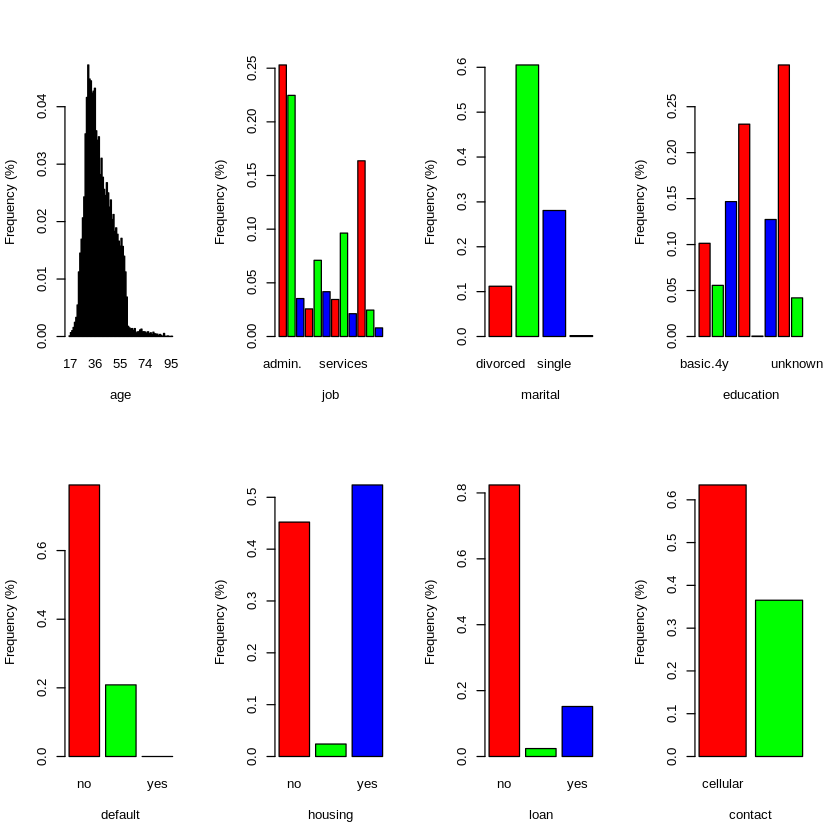

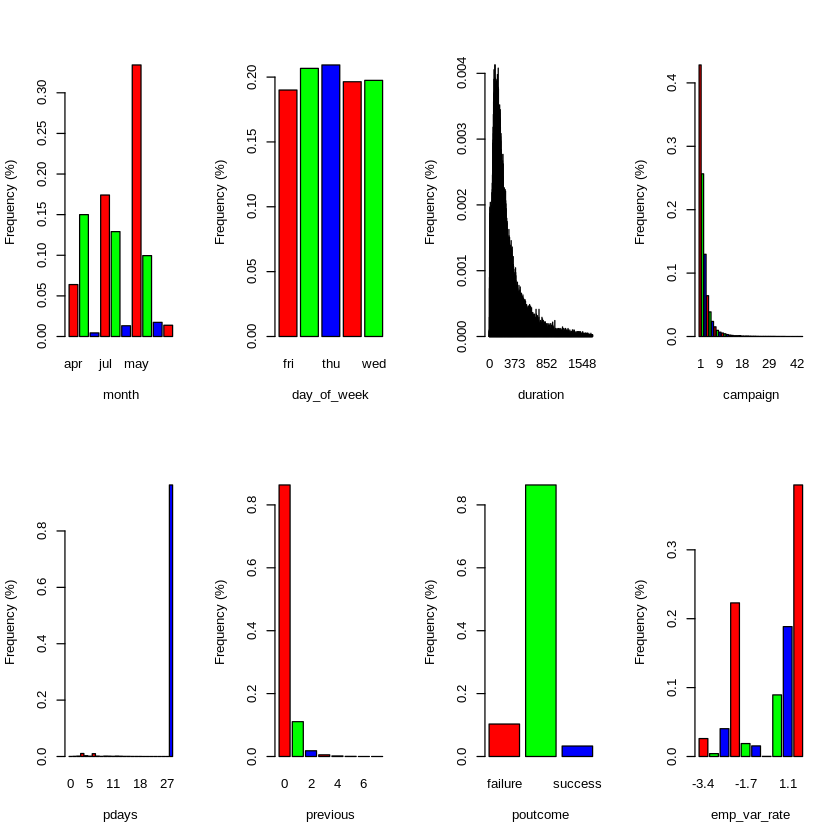

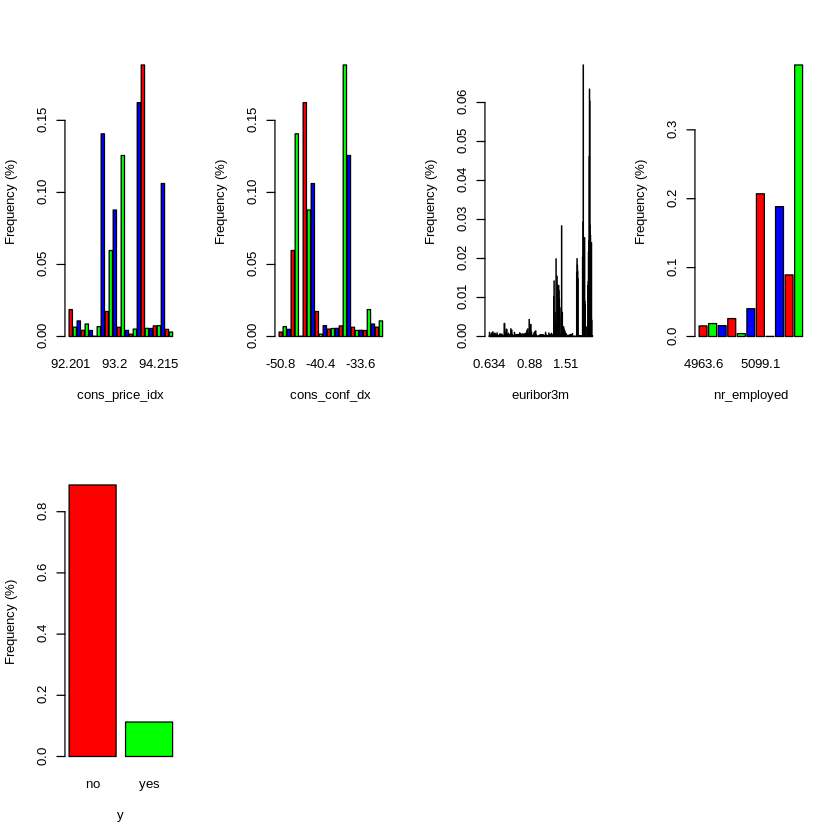

In [ ]:
# Analyzing barplots of variables

# The mfrow and mfcol parameters allow you to create a matrix of plots 
# in one plotting space. Both parameters take a vector of length two as an 
# argument, corresponding to the number of rows and columns in the resulting 
# plotting matrix. 

par(mfrow=c(2,4))


# Plot all columns

for(col in 1:length(bank_data))
  {barplot(prop.table(table(bank_data[,col])) , 
           xlab=names(bank_data[col]), ylab= "Frequency (%)" , 
           col = rainbow(3))}
  




## **Boxplot**

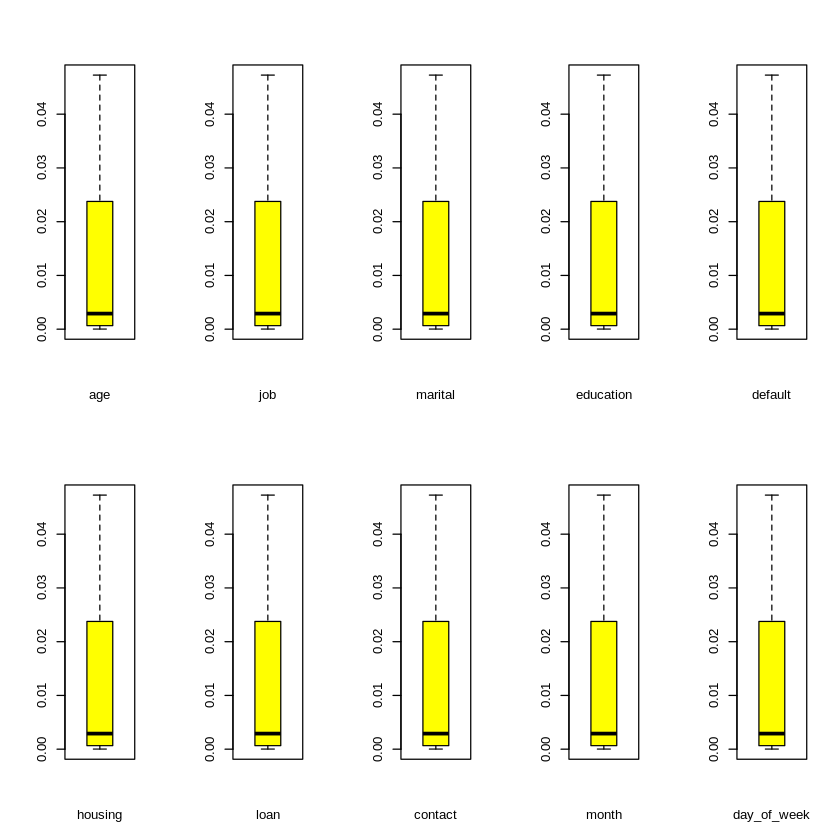

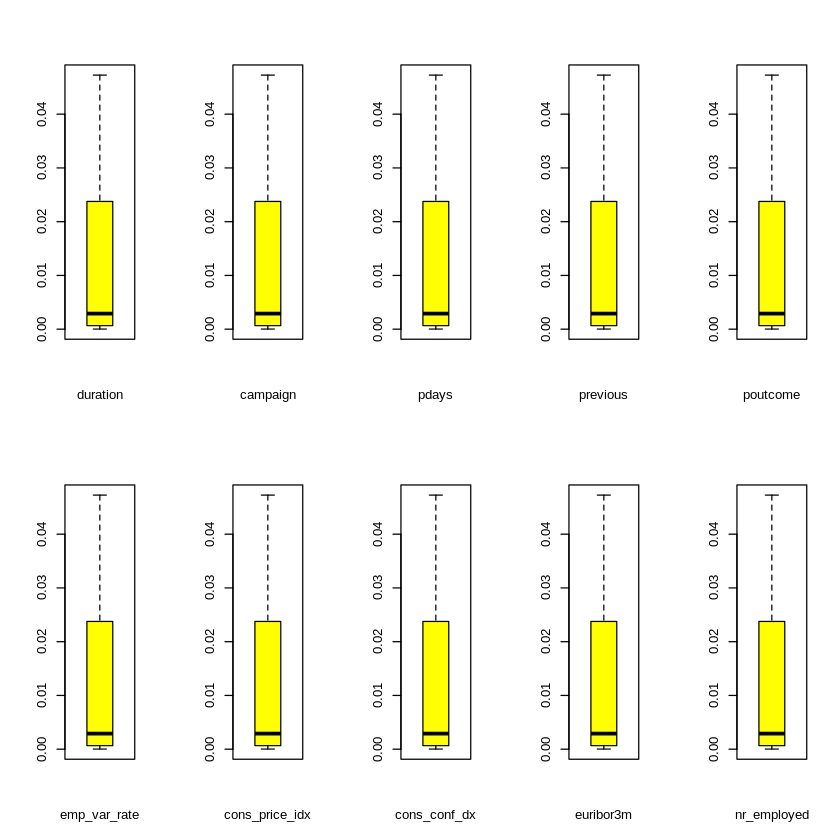

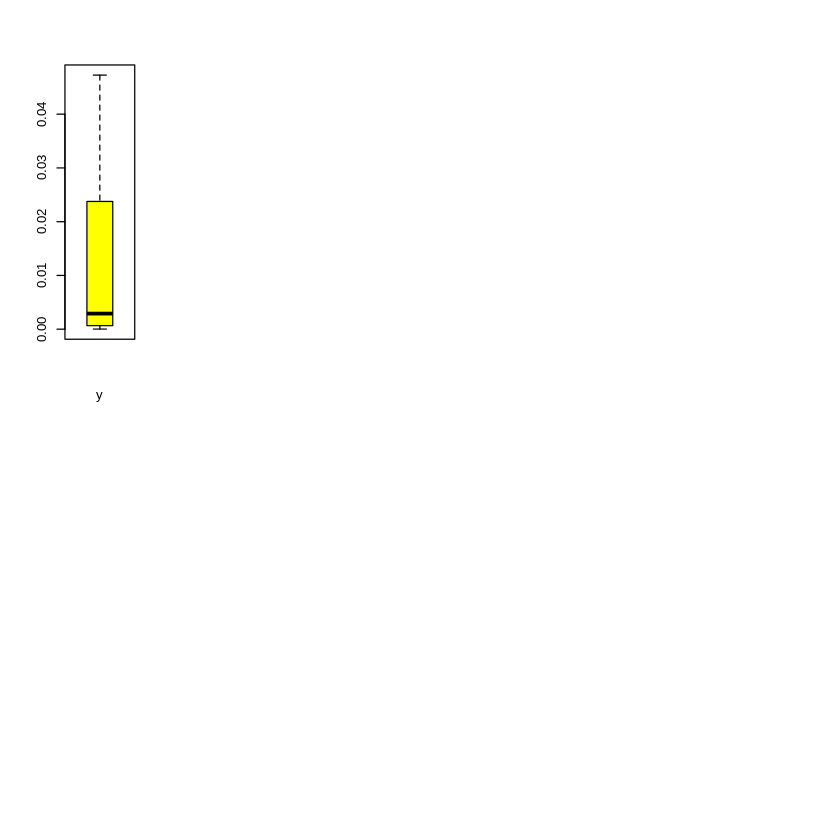

In [ ]:
# Analyzing boxplots of variables

# The mfrow and mfcol parameters allow you to create a matrix of plots 
# in one plotting space. Both parameters take a vector of length two as an 
# argument, corresponding to the number of rows and columns in the resulting 
# plotting matrix. 

par(mfrow=c(2,5))


for(col in 1:length(bank_data))
  {boxplot(prop.table(table(bank_data[,1])),
           col="yellow", 
           xlab=names(bank_data[col]))
  }
  




# **Cross Tabulation**

* Cross tabulation is used to quantitatively analyze the relationship between multiple variables. 
* Cross tabulations — also referred to as **contingency tables** or **crosstabs** — group variables together and enable researchers to understand the correlation between the different variables

* You can generate frequency tables using the **table()** function and tables of proportions using the **prop.table()** function

#### **Example of a crosstab of two variables**
* The table below is a crosstab that shows by age whether somebody has an unlisted phone number. 
* This table shows the number of observations with each combination of possible values of the two variables in each cell of the table.  
* We can see, for example, that 185 people are aged 18 to 34 and do not have an unlisted phone number.  Column percentages are also shown (these are percentages within the columns, so that each column’s percentages add up to 100%); for example, 24% of all people without an unlisted phone number are aged 18 to 34 in the sample.

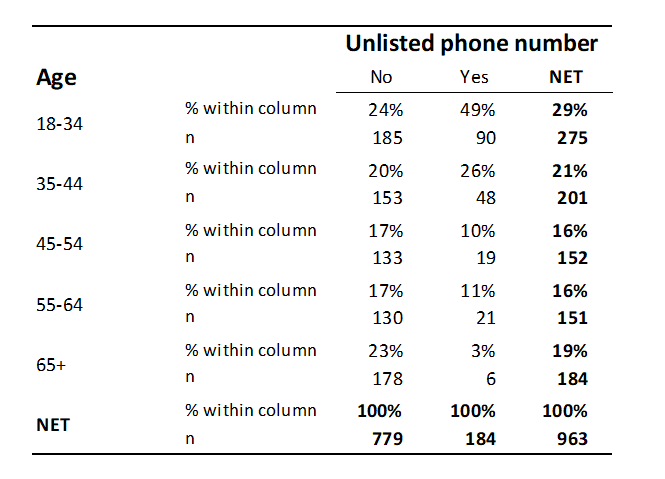

### **Example**

In [ ]:
# Create a data frame
teamsDF <- data.frame(
                 team=     c('A', 'A', 'A', 'A', 'B', 'B', 'B', 'B'),
                 position= c('G', 'G', 'F', 'C', 'G', 'F', 'F', 'C'),
                 points=   c(7, 7, 8, 11, 13, 15, 19, 13))

#view the data frame
teamsDF





team,position,points
<chr>,<chr>,<dbl>
A,G,7
A,G,7
A,F,8
A,C,11
B,G,13
B,F,15
B,F,19
B,C,13


In [ ]:
# We can use the following code to create a crosstab for the position and 
# team variables:

teamsTable <- table(teamsDF$position, teamsDF$team)

ftable(teamsTable)



   A B
      
C  1 1
F  1 2
G  2 1

### **Interpretation of the above table:**

* There is 1 player who has a position of ‘C’ and belongs to team ‘A’
* There is 1 player who has a position of ‘C’ and belongs to team ‘B’
* There is 1 player who has a position of ‘F’ and belongs to team ‘A’
* There are 2 players who have a position of ‘F’ and belong to team ‘B’
* There are 2 players who have a position of ‘G’ and belong to team ‘A’
* There is 1 player who has a position of ‘G’ and belongs to team ‘B’

# **Connecting R to MySQL**

In [ ]:
# Need to install the following package before making a connection

install.packages("RMySQL")

library("RMySQL")

connection <- dbConnect(MySQL(), user = 'ids???', password = '???', host = '208.109.18.154', dbname = 'ids???db')

# Create the table and export the entire data set
dbWriteTable(connection, "teamsDF", teamsDF, overwrite=TRUE)



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: DBI



ERROR: ignored

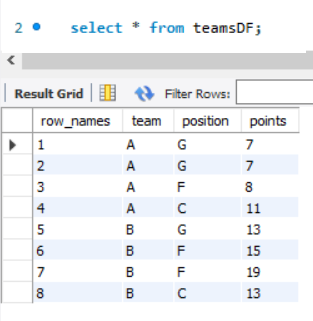

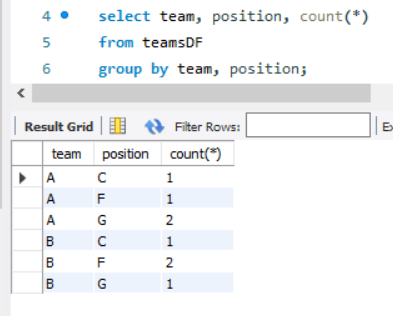

## **Back to the Bank Data**

In [ ]:
# A 2-Way Frequency Table for categorical attributes

# $marital will be rows, $y will be columns
mytable <- table(bank_data$marital, bank_data$y)

mytable




          
              no   yes
  divorced  4136   476
  married  22396  2532
  single    9948  1620
  unknown     68    12

In [ ]:
# $marital frequencies summed over $y
margin.table(mytable, 1) 


# $y frequencies summed over $marital
margin.table(mytable, 2) 



divorced  married   single  unknown 
    4612    24928    11568       80 


   no   yes 
36548  4640 

In [ ]:
# cell, row, and column percentages

prop.table(mytable) # cell percentages

prop.table(mytable, 1) # row percentages

prop.table(mytable, 2) # column percentages




          
                    no         yes
  divorced 0.100417597 0.011556764
  married  0.543750607 0.061474216
  single   0.241526658 0.039331844
  unknown  0.001650966 0.000291347

          
                  no       yes
  divorced 0.8967910 0.1032090
  married  0.8984275 0.1015725
  single   0.8599585 0.1400415
  unknown  0.8500000 0.1500000

          
                    no         yes
  divorced 0.113166247 0.102586207
  married  0.612783189 0.545689655
  single   0.272189997 0.349137931
  unknown  0.001860567 0.002586207

In [ ]:
# table( ) can also generate multidimensional tables based on 3 or more categorical 
# variables. 

# In this case, use the ftable( ) function to print the results more attractively.


# 3-Way Frequency Table
mytable <- table(bank_data$marital, bank_data$poutcome, bank_data$y)


# Flat Contingency Tables
ftable(mytable)







                         no   yes
                                 
divorced failure        442    60
         nonexistent   3658   323
         success         36    93
married  failure       2046   338
         nonexistent  20096  1725
         success        254   469
single   failure       1147   206
         nonexistent   8614  1085
         success        187   329
unknown  failure         12     1
         nonexistent     54     8
         success          2     3

In [ ]:
# The CrossTable( ) function in the gmodels package produces crosstabulations 
# modeled after PROC FREQ in SAS or CROSSTABS in SPSS. It has a wealth of options.

# 2-Way Cross Tabulation
install.packages("gmodels")
library(gmodels)

CrossTable(bank_data$marital, bank_data$y)


# For more information: help(CrossTable)



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gtools’, ‘gdata’





 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  41188 

 
                  | bank_data$y 
bank_data$marital |        no |       yes | Row Total | 
------------------|-----------|-----------|-----------|
         divorced |      4136 |       476 |      4612 | 
                  |     0.464 |     3.652 |           | 
                  |     0.897 |     0.103 |     0.112 | 
                  |     0.113 |     0.103 |           | 
                  |     0.100 |     0.012 |           | 
------------------|-----------|-----------|-----------|
          married |     22396 |      2532 |     24928 | 
                  |     3.450 |    27.174 |           | 
                  |     0.898 |     0.102 |     0.605 | 
                  |     0.613 |     0.546 |           | 
                  |     0.

# **Plotting with ggplot2**

* It’s hard to succinctly describe how ggplot2 works because it embodies a deep philosophy of visualisation. 
* However, in most cases you start with ggplot(), supply a dataset and aesthetic mapping (with aes()). 
* You then add on layers (like geom_point() or geom_histogram()), scales (like scale_colour_brewer()), faceting specifications (like facet_wrap()) and coordinate systems (like coord_flip()).

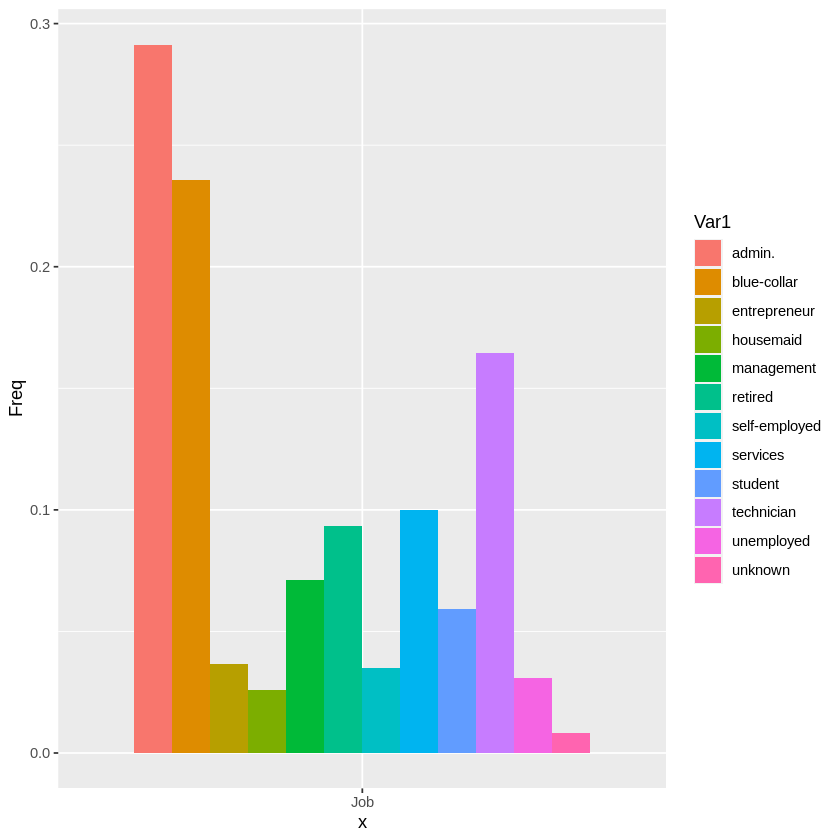

In [ ]:
# Let's plot a few things

library("ggplot2")

# the contingency table for $job vs. $y variables
P <- prop.table(table(bank_data$job, bank_data$y), margin=2)  
   

# Aesthetic are plots parameters that are given by the data.
ggplot(as.data.frame(P), aes(x = 'Job', y = Freq, fill = Var1)) +

# dodge: display the bars next to each other, try 'fill' as well for proportions
# count the rows for each x value
# identity: skip aggregation
geom_bar(stat="identity", position = "dodge") 

   

### **Checking for Missing Values**

* In R, missing values are represented by the symbol **NA** (not available). 
* Impossible values (e.g., dividing by zero) are represented by the symbol **NaN** 
(not a number).

In [ ]:
# Does $age have any missing values?

# is.na(bank_data$age) returns a vector, e.g., (F, F, F, T, F, ...)
sum(is.na(bank_data$age))




[1] 0

### **Excluding Missing Values from Analyses**

* Arithmetic functions on missing values yield missing values.

In [ ]:
# Example

x <- c(1, 2, NA, 3)

mean(x) # returns NA

mean(x, na.rm=TRUE) # returns 2




[1] NA

[1] 2

* The function **na.omit()** returns the object with listwise deletion of missing values.
* E.g., **newdata <- na.omit(mydata)**


In [ ]:
# nothing needs to be done here
sum(is.na(bank_data))




[1] 0

# **Adding New Columns**

* When we add a new column to an existing R data frame, that column is added at the end of the columns
* n <- dim(bank_data)[1]
* bank_data$ID = c(1:n)
* But, to add a column to the front we would need another approach

In [ ]:
# Add an int ID field in the front to give each row a unique ID

n <- dim(bank_data)[1]
ID = c(1:n)

bank_data <- cbind(ID, bank_data)

head(bank_data)




,ID,age,job,marital,education,default,housing,loan,contact,month,⋯,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_dx,euribor3m,nr_employed,y
,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,1,56,housemaid,married,basic.4y,no,no,no,telephone,may,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,2,57,services,married,high.school,unknown,no,no,telephone,may,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,3,37,services,married,high.school,no,yes,no,telephone,may,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,4,40,admin.,married,basic.6y,no,no,no,telephone,may,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
5,5,56,services,married,high.school,no,no,yes,telephone,may,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
6,6,45,services,married,basic.9y,unknown,no,no,telephone,may,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [ ]:
# Let's verify the new shape

dim(bank_data)





[1] 41188    22

In [ ]:
# To remove the new column:

# bank_data <- subset (bank_data, select = -ID)

# head(bank_data)


## **Changing Misleading Attribute Values**

* The field **pdays** is a count of the number of days since the client was last contacted from a previous campaign. 
* This field is clearly numeric, so when we 
look at the histogram of days_since_previous most of the data values are near 1000, with a minority of values near zero.
* It turns out that the database administrator used the code 999 to represent customers who had not been contacted previously.
*  So, we need to change the field value 999 to missing.

In [ ]:
bank_data$pdays



[1] 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999
   [19] 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999
   [37] 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999
   [55] 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999
   [73] 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999
   [91] 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999
  [109] 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999
  [127] 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999
  [145] 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999
  [163] 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999
  [181] 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999
  [199] 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999
  [217] 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999
  [235] 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999
  [253] 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999
  [271] 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999
  [289] 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999
  [307] 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999
  [325] 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999
  [343] 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999
  [361] 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999
  [379] 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999
  [397] 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999
  [415] 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999
  [433] 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999
  [451] 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999
  [469] 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999
  [487] 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999
  [505] 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999
  [523] 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999
  [541] 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999
  [559] 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999
  [577] 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999
  [595] 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999
  [613] 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999
  [631] 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999
  [649] 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999
  [667] 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999
  [685] 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999
  [703] 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999
  [721] 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999
  [739] 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999
  [757] 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999
  [775] 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999
  [793] 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999
  [811] 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999
  [829] 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999
  [847] 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999
  [865] 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999
  [883] 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999
  [9

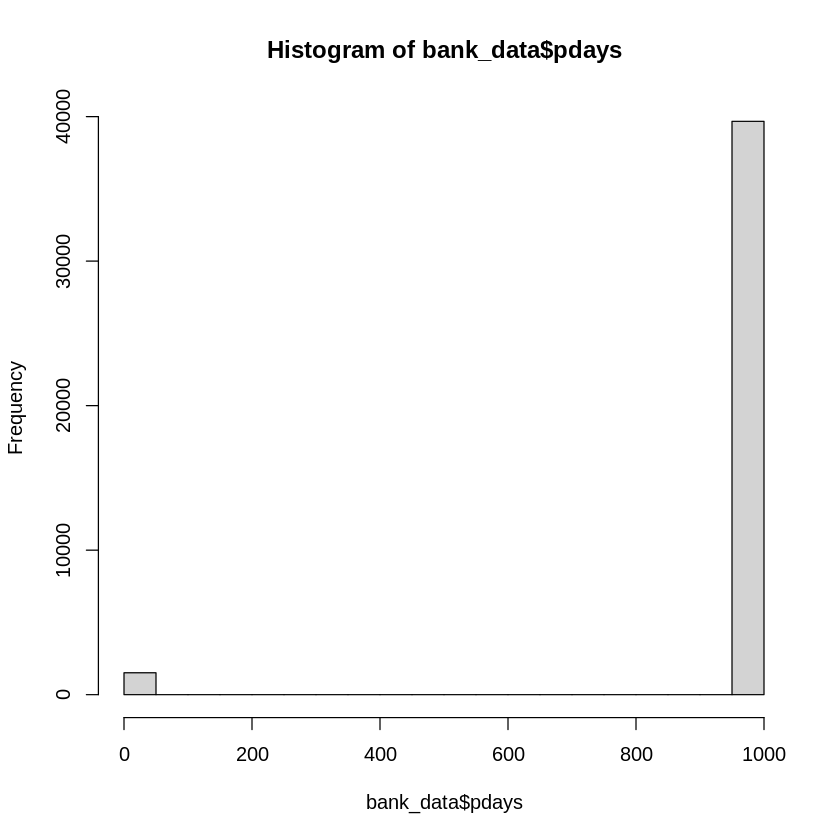

In [ ]:
hist(bank_data$pdays)



* We need to identify each instance of 999 in the **pdays** variable, 
and replace it with the R code value for a missing value, NA.

* The **ifelse()** command checks the condition specified under test =, then
assigns the **pdays** variable the value given after yes = if the test
condition is true, and assigns the **pdays** variable the value given after
 if the test condition is false.

In [ ]:
# Replace all 999's by NA

bank_data$pdays <- ifelse(bank_data$pdays == 999, yes = NA, no = bank_data$pdays)




In [ ]:
# How many missing values are there now?

sum(is.na(bank_data$pdays))




[1] 39673

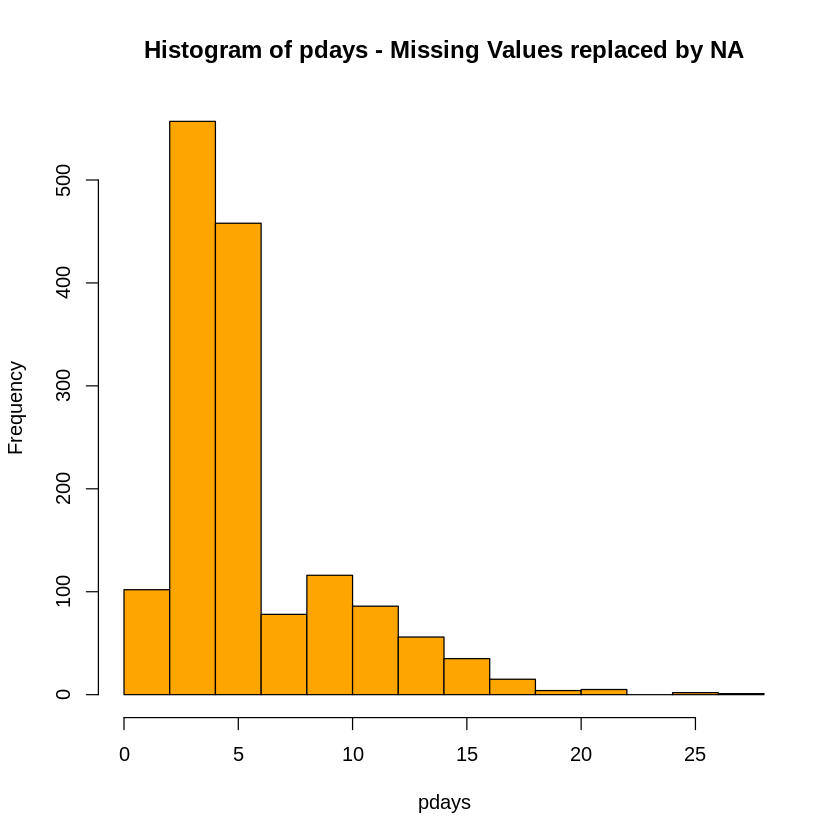

In [ ]:
# Redo the histogram

hist(bank_data$pdays, xlab = "pdays", 
       main = "Histogram of pdays - Missing Values replaced by NA", col="orange")




## **Reexpression of Categorical Data as Numeric**

* The following shows a bar graph of the **education** field. 
* Note that the field is categorical, meaning that there is no ordering of the field values. 
* In other words, if we left the field as it is, then our data science algorithms would not know that university_ degree represents more education than basic.4yr. 
* To provide this information to our
algorithms, we transform the data values into numeric values, where it is clear that one value is larger than another. 
* One needs to proceed with care when doing this, so that the relative differences among the various categories are preserved.

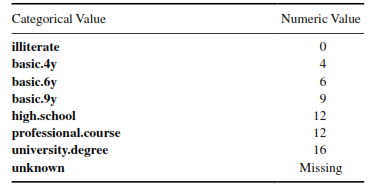

In [ ]:
# What are the distinct educational levels?


levels(factor(bank_data$education))



[1] "basic.4y"            "basic.6y"            "basic.9y"           
[4] "high.school"         "illiterate"          "professional.course"
[7] "university.degree"   "unknown"

In [ ]:
# The SQL command for grouping

#  select education, count(*)
#  from   bank_data
#  group by education;



# compare to: as.data.frame(ftable(bank_data$education))
ftable(bank_data$education)




 basic.4y basic.6y basic.9y high.school illiterate professional.course university.degree unknown
                                                                                                
     4176     2292     6045        9515         18                5243             12168    1731

### **The Formattable Package**

* The above table is not very easy to read
* Formattable data frames are data frames to be rendered as HTML table with formatter functions applied.



In [ ]:
# Install and load the needed library

install.packages("formattable")
library(formattable)



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘htmlwidgets’




In [ ]:
# Let's format the previous summary table

# save the table in a data frame
eduDF <- as.data.frame(ftable(bank_data$education))

# rename the columns
names(eduDF)[1] <- "Education_Category"
names(eduDF)[2] <- "Frequenecy"


#  select education, count(*)
#  from   bank_data
#  group by education
#  order by education desc;

# Compare to format_table(eduDF[order(eduDF$Frequenecy, decreasing=TRUE), 1:2])
# Try it here: https://htmledit.squarefree.com/
formattable(eduDF[order(eduDF$Frequenecy, decreasing=TRUE), 1:2])





,Education_Category,Frequenecy
,<fct>,<int>
7,university.degree,12168
4,high.school,9515
3,basic.9y,6045
6,professional.course,5243
1,basic.4y,4176
2,basic.6y,2292
8,unknown,1731
5,illiterate,18


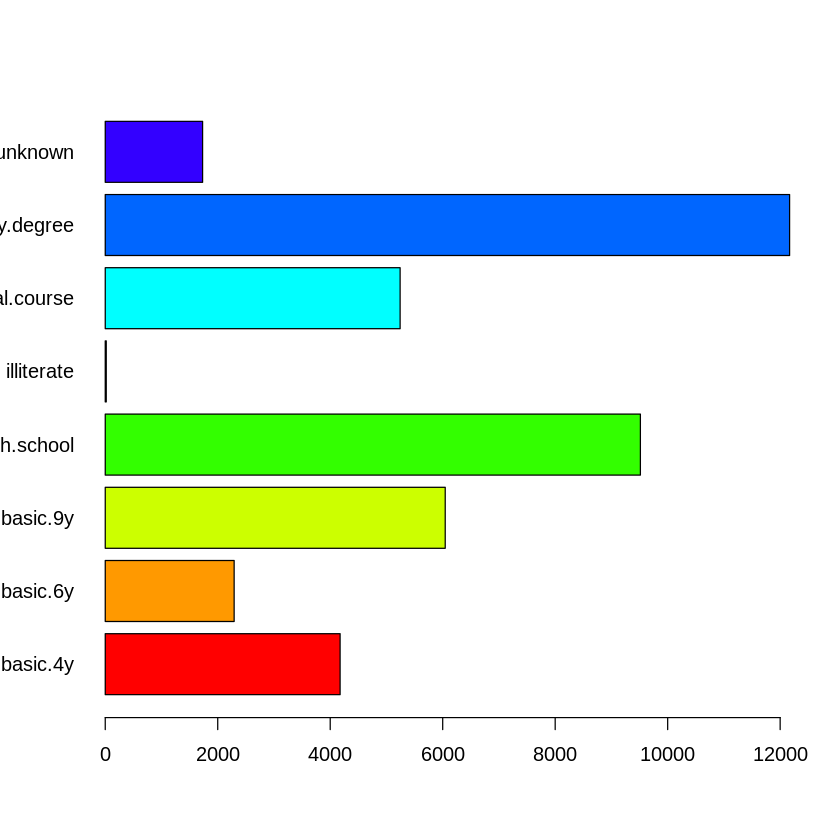

In [ ]:
# Do a bar graph of the educational levels

barplot(table(bank_data$education), 
           xlab=names(bank_data$education), 
           col = rainbow(10),
           horiz = TRUE, 
           # horizontal labels
           las=1)
  

## **What is plyr?**

* plyr is an R package that makes it simple to split data apart, do stuff to it, and mash it back together. 
* This is a common data-manipulation step. 
* Importantly, plyr makes it easy to control the input and output data format from a syntactically consistent set of functions.

In [ ]:
# Let's install and load in one line

install.packages("plyr"); library(plyr)




Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# We now need to specify which values of education go with which numeric values,
# following the rules specified before

# The revalue() function replaces values in the variable given in the x input,
# according to the rules given in the replace input. Within the replace = input, 
# we use c()to string together each piece of recoding, using the structure

#  Use R’s value for missing values, NA, where necessary

edu_num <- revalue(x = bank_data$education, replace =
     c("illiterate" = 0, "basic.4y" = 4,  "basic.6y" = 6, 
       "basic.9y" = 9, "high.school" = 12,"professional.course" = 12,
       "university.degree" = 16, "unknown" = NA))

edu_num




[1] "4"  "12" "12" "6"  "12" "9"  "12" NA   "12" "12" NA   "12" "12" "4" 
   [15] "6"  "9"  "6"  "6"  "9"  "9"  "12" "4"  "12" "12" "12" "16" NA   "9" 
   [29] "16" "16" NA   NA   NA   "4"  "4"  "4"  "12" "9"  "16" "4"  "16" "12"
   [43] "12" "16" "16" "12" "16" "9"  "16" "9"  "12" "4"  "12" "12" "4"  "12"
   [57] "16" "12" "12" "16" "16" "9"  "6"  "6"  "12" "16" "9"  NA   "9"  "4" 
   [71] "6"  "16" "16" NA   "16" "4"  "16" "12" NA   "9"  "4"  "4"  "12" "16"
   [85] "16" "12" "6"  "16" "9"  "12" "16" NA   NA   "9"  "6"  "12" "16" "16"
   [99] "12" "6"  NA   "4"  NA   "16" "16" "12" "6"  "12" NA   NA   "16" "4" 
  [113] "12" "9"  "16" "12" "16" NA   NA   "4"  "12" "12" "12" "12" "16" "16"
  [127] "6"  "12" "4"  "12" "6"  "12" NA   "6"  "16" "16" "4"  "4"  "12" "9" 
  [141] "16" NA   "16" "4"  "12" "4"  "4"  "12" "16" "4"  "9"  NA   "12" NA  
  [155] NA   "9"  NA   NA   "12" "12" "16" "9"  "9"  "9"  "12" "6"  "12" NA  
  [169] NA   "16" "12" "12" "16" "16" "12" "9"  "12" "6"  "12" "9"  "12" "6" 
  [183] "9"  "16" "4"  "16" "6"  "12" "4"  "16" "12" "9"  "16" "16" "9"  "4" 
  [197] "12" "9"  "9"  "6"  "12" "6"  "12" NA   "9"  "16" "16" "12" "4"  "16"
  [211] "9"  "16" "16" NA   "12" "4"  NA   NA   "4"  "12" "12" NA   "6"  "4" 
  [225] "9"  "16" "16" "16" "4"  "4"  "12" "12" "4"  "12" "16" "12" "4"  "12"
  [239] "12" "16" "12" "12" "16" "9"  "16" NA   "12" "12" "12" "12" "12" "4" 
  [253] "6"  "12" NA   "12" "9"  "9"  NA   "12" "12" "6"  "12" "9"  "16" "6" 
  [267] "16" "16" "16" "4"  "12" "16" "9"  "12" "12" "9"  "12" "4"  "9"  "12"
  [281] "6"  "4"  "9"  "9"  "9"  "6"  "9"  "12" NA   "12" "16" "12" "12" "4" 
  [295] "12" "12" "12" "16" "12" NA   "12" "12" "12" NA   "12" "6"  NA   "4" 
  [309] "16" "4"  "16" "16" "12" "12" "16" "9"  "12" "6"  "9"  "12" "9"  "6" 
  [323] NA   "6"  "12" "12" "16" "12" "9"  "12" "12" "9"  "12" "16" "12" "12"
  [337] "12" "12" "9"  "16" "12" "12" "9"  NA   "4"  "12" "12" "9"  "16" "4" 
  [351] "6"  "12" "16" "12" "16" "16" "12" "9"  "4"  "4"  "12" "16" "12" "4" 
  [365] "16" "16" "12" "9"  "9"  "12" "9"  "9"  "12" "9"  "12" NA   "6"  "16"
  [379] "9"  "16" NA   "9"  "16" NA   "4"  "4"  "16" "6"  NA   "12" "16" "12"
  [393] "16" "12" "9"  "12" "12" "4"  "16" "9"  "12" "12" "12" "16" "4"  "16"
  [407] "6"  "12" "12" "9"  "12" "4"  "9"  "4"  "4"  "4"  "9"  "12" "12" "16"
  [421] "4"  "4"  "4"  "16" "4"  "9"  "6"  "12" NA   "12" "16" "9"  "16" "12"
  [435] NA   "12" "9"  "12" "16" NA   "12" "16" "9"  "16" "9"  NA   "12" "4" 
  [449] "4"  "4"  "4"  "9"  "16" "16" "12" "12" "12" "4"  "4"  "6"  "9"  "12"
  [463] "16" "9"  "12" "12" "6"  "12" "4"  "16" "12" "12" "12" "16" "4"  "9" 
  [477] NA   "4"  "16" NA   "12" "12" "4"  NA   "6"  "16" "16" "12" "12" NA  
  [491] "16" "9"  "9"  "9"  "16" "12" "12" "16" "12" "6"  "16" "9"  "9"  "12"
  [505] "12" "16" "16" NA   "16" "12" "4"  "12" "16" "9"  "12" NA   "4"  "4" 
  [519] NA   NA   "9"  "9"  "6"  "6"  "12" NA   "12" "12" "16" "12" "12" "12"
  [533] "6"  "9"  "12" "12" "12" "4"  "6"  "16" NA   "9"  "12" "16" "12" "12"
  [547] "16" "12" "16" "4"  "16" "9"  "6"  "16" "4"  "4"  "12" "4"  "4"  "6" 
  [561] "4"  "6"  "4"  "16" "16" "6"  "12" NA   "16" "16" "12" "12" "9"  "4" 
  [575] "12" "12" "12" "12" "16" NA   "16" "4"  NA   "12" NA   "16" "16" "4" 
  [589] "4"  "6"  "12" "12" "16" "12" "16" "12" "9"  "12" "16" "12" "16" "9" 
  [603] "9"  "12" "16" "16" "12" "4"  "9"  "12" "6"  "12" "4"  "16" "16" "6" 
  [617] "12" "4"  "12" "9"  "16" "12" "12" "12" NA   "9"  "12" "4"  NA   "12"
  [631] "16" "16" "6"  "4"  "16" "12" "16" "16" NA   "16" "4"  "12" "4"  "12"
  [645] "12" "16" "16" "12" "9"  "12" "12" "12" "4"  "9"  NA   "12" "4"  "16"
  [659] "16" "16" "4"  NA   "12" "16" "6"  "9"  "16" "16" "9"  "12" "16" "12"
  [673] "12" "12" "12" "12" "12" "16" "12" "16" "4"  "12" "16" "12" "12" "9" 
  [687] "4"  "12" "12" "16" "16" "16" "12" "4"  "16" "12" "4"  "4"  "9"  "16"
  [701] "9"  "6"  "9"  "16" "9"  "16" "16" "4"  "12" "16" "9"  "16" "16" "16"
  [715] "12" "9"  "16" "12

In [ ]:
# Let's check for missing values in edu_num


sum(is.na(edu_num))




[1] 1731

* Currently, the values of edu_num are not numeric (e.g. we cannot make a
histogram using them), so we need to convert the levels of the variable to the 
numeric type. 



In [ ]:
# Save the numeric values in a new column

bank_data$education_numeric <- as.numeric(edu_num)




In [ ]:
# Display  the numeric values in a new column

bank_data$education_numeric




[1]  4 12 12  6 12  9 12 NA 12 12 NA 12 12  4  6  9  6  6  9  9 12  4 12 12
   [25] 12 16 NA  9 16 16 NA NA NA  4  4  4 12  9 16  4 16 12 12 16 16 12 16  9
   [49] 16  9 12  4 12 12  4 12 16 12 12 16 16  9  6  6 12 16  9 NA  9  4  6 16
   [73] 16 NA 16  4 16 12 NA  9  4  4 12 16 16 12  6 16  9 12 16 NA NA  9  6 12
   [97] 16 16 12  6 NA  4 NA 16 16 12  6 12 NA NA 16  4 12  9 16 12 16 NA NA  4
  [121] 12 12 12 12 16 16  6 12  4 12  6 12 NA  6 16 16  4  4 12  9 16 NA 16  4
  [145] 12  4  4 12 16  4  9 NA 12 NA NA  9 NA NA 12 12 16  9  9  9 12  6 12 NA
  [169] NA 16 12 12 16 16 12  9 12  6 12  9 12  6  9 16  4 16  6 12  4 16 12  9
  [193] 16 16  9  4 12  9  9  6 12  6 12 NA  9 16 16 12  4 16  9 16 16 NA 12  4
  [217] NA NA  4 12 12 NA  6  4  9 16 16 16  4  4 12 12  4 12 16 12  4 12 12 16
  [241] 12 12 16  9 16 NA 12 12 12 12 12  4  6 12 NA 12  9  9 NA 12 12  6 12  9
  [265] 16  6 16 16 16  4 12 16  9 12 12  9 12  4  9 12  6  4  9  9  9  6  9 12
  [289] NA 12 16 12 12  4 12 12 12 16 12 NA 12 12 12 NA 12  6 NA  4 16  4 16 16
  [313] 12 12 16  9 12  6  9 12  9  6 NA  6 12 12 16 12  9 12 12  9 12 16 12 12
  [337] 12 12  9 16 12 12  9 NA  4 12 12  9 16  4  6 12 16 12 16 16 12  9  4  4
  [361] 12 16 12  4 16 16 12  9  9 12  9  9 12  9 12 NA  6 16  9 16 NA  9 16 NA
  [385]  4  4 16  6 NA 12 16 12 16 12  9 12 12  4 16  9 12 12 12 16  4 16  6 12
  [409] 12  9 12  4  9  4  4  4  9 12 12 16  4  4  4 16  4  9  6 12 NA 12 16  9
  [433] 16 12 NA 12  9 12 16 NA 12 16  9 16  9 NA 12  4  4  4  4  9 16 16 12 12
  [457] 12  4  4  6  9 12 16  9 12 12  6 12  4 16 12 12 12 16  4  9 NA  4 16 NA
  [481] 12 12  4 NA  6 16 16 12 12 NA 16  9  9  9 16 12 12 16 12  6 16  9  9 12
  [505] 12 16 16 NA 16 12  4 12 16  9 12 NA  4  4 NA NA  9  9  6  6 12 NA 12 12
  [529] 16 12 12 12  6  9 12 12 12  4  6 16 NA  9 12 16 12 12 16 12 16  4 16  9
  [553]  6 16  4  4 12  4  4  6  4  6  4 16 16  6 12 NA 16 16 12 12  9  4 12 12
  [577] 12 12 16 NA 16  4 NA 12 NA 16 16  4  4  6 12 12 16 12 16 12  9 12 16 12
  [601] 16  9  9 12 16 16 12  4  9 12  6 12  4 16 16  6 12  4 12  9 16 12 12 12
  [625] NA  9 12  4 NA 12 16 16  6  4 16 12 16 16 NA 16  4 12  4 12 12 16 16 12
  [649]  9 12 12 12  4  9 NA 12  4 16 16 16  4 NA 12 16  6  9 16 16  9 12 16 12
  [673] 12 12 12 12 12 16 12 16  4 12 16 12 12  9  4 12 12 16 16 16 12  4 16 12
  [697]  4  4  9 16  9  6  9 16  9 16 16  4 12 16  9 16 16 16 12  9 16 12  6  4
  [721] 16  4  4  4 12  9 12 16  9 12 NA 12 12  4 16  4  4 12 16 NA 12  4  4 12
  [745]  9  6  4 12 16 12  9  4 12 16 12  9 16  4  9 12  4  4 12 16 12 16 16 16
  [769] NA 12  4 NA NA 12  9  4 NA  9 12 12  6 12 12  6  6 16  9  4 12  9  9 16
  [793] 12  9  9 NA 12 NA  9  6  4 12 12 16 12  6 NA 16 12 16 12 12 12 16 12  9
  [817] NA  4 12  9 16 16  6 16 12 12 12 16  9 16  9 12  9 12  9  9 12  9 12 16
  [841] NA 12  9 16 12  9 12 12 12 16  4  6  6  6  4 16 16 12  6 NA 16  6 12 16
  [865] NA 12 12 12 NA 16  9 12 12 12 16  6  4 16  9 12 12  9 16  4 NA 12 12 16
  [889] 12 16 NA  6  9 12 12 12  9  6  6 12 12  4  6 16  4 12  9  9 12 NA  6  4
  [913] 12 12  9 12  4  9  6 12  4  9  9  6 16 16 12  9  9 12  4 12  6 12  9 12
  [937]  9 16 16 12 16  9 12  4 12 16  9  4 12  6 12 NA 12  9  9 12 NA  4  9  4
  [961] 12 NA 12  9  4 NA 16  4 12 16  9 NA  9 16  9  6  6 16 12  4 16  4 16 16
  [985]  6 16  6 12 16  4 12 12  9  6  9  6 12  6  9 NA  4 12 NA  6 16 12  9 12
 [1009]  4 12 16 16 12 16  9  4  4  4 12  9  4 12 12 12  4 12  9 12 12 12  4 12
 [1033] 12  4 16 12 12 12  4 12 12 12 12 16 12  4  4 16  6  4 12  6 12  4 12  4
 [1057] 12 12 16 12  9  4  4 16 12  4 NA  4  6  4  9 16 16  4 12 16 NA 16  4  9
 [1081]  4 12 12 12 12  6  4 12  4  6  9 12 16 16 12  9 12  4 12 12  4  6 12 NA
 [1105] NA 16  4 16  9 12 16  4  6 16 16 12 12 16  9 16  9 NA  9  4 12 12 16 12
 [1129] 16  9 16 12  4  9  9  9 12  6 12  9  4  9  9 12  4 16 12 12  9 16  9 12
 [1153] 16 12 12 12 16  4 12 12 NA  9 12 12 16  4 12  4  6 12 12 12 12 12 12  9
 [1177]  4  6  9 12  6  6 12 12 12 12 16  6 12  9  4  6  6 16  6 NA  9 16  6 NA
 [12

In [ ]:
# Tabulate the new column's category frequencies; this ignores the NA values

# compare to table(bank_data$education_numeric, useNA = "ifany")
table(bank_data$education_numeric)






    0     4     6     9    12    16 
   18  4176  2292  6045 14758 12168 

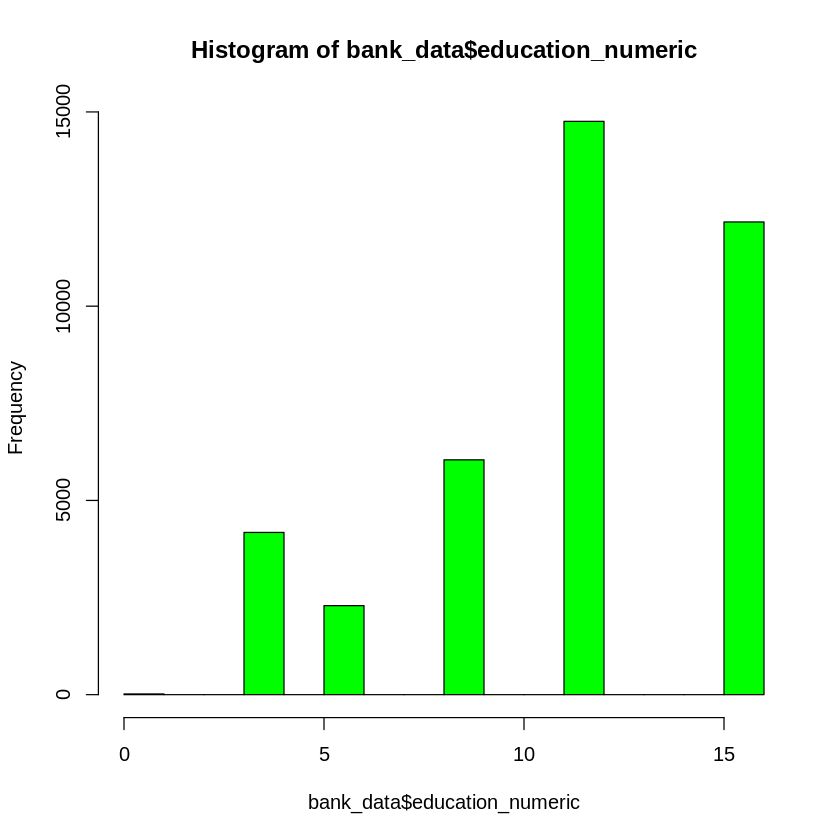

In [ ]:
# The histogram of the reexpressed education field as numeric

hist(bank_data$education_numeric, col="green")




# **Standardizing the Numeric Fields**


* Certain algorithms perform better when the numeric fields are standardized so that the attribute mean equals 0 and the attribute standard deviation equals 1

* Positive z‐values may be interpreted as representing the number of standard
deviations above the mean the data value lies, while negative z‐values represent the number of standard deviations below the mean. 
* Some analysts standardize all their numeric fields as a matter of course. 

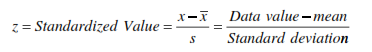

### **The scale() Function**

* We do not have to install or load a package for this code. 
* The scale() function can center a variable by subtracting its mean, scale it by dividing by the standard deviation, or both. 
* By default, it does both, as needed to calculate the z‐score. 
* Thus, using the default settings of the scale() function on the   **bank_data$age** variable will return the z‐scores of the variable. 



In [ ]:
bank_data$scaled_age <- scale(x = bank_data$age)

summary(bank_data$scaled_age)


       V1         
 Min.   :-2.2093  
 1st Qu.:-0.7700  
 Median :-0.1942  
 Mean   : 0.0000  
 3rd Qu.: 0.6694  
 Max.   : 5.5632  

### **The MinMax Scaler**





In [ ]:
norm_minmax <- function(x){
                           (x- min(x)) /(max(x)-min(x))
                          }

bank_data$scaled_duration <- norm_minmax(bank_data$duration)

summary(bank_data$scaled_duration)



   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.02074 0.03660 0.05252 0.06486 1.00000 

## **Imputing Missing Values**

* **Hmisc** is a multiple purpose package useful for data analysis, high – level graphics, imputing missing values, advanced table making, model fitting & diagnostics (linear regression, logistic regression & cox regression) etc. 

* **impute()** function simply imputes missing value using user defined statistical method (mean, max, median). It’s default is median.

In [ ]:
# Install and load Hmisc

install.packages("Hmisc")
library(Hmisc)




Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘png’, ‘jpeg’, ‘checkmate’, ‘Formula’, ‘latticeExtra’, ‘gridExtra’, ‘htmlTable’, ‘viridis’


Loading required package: lattice

Loading required package: survival

Loading required package: Formula


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:plyr’:

    is.discrete, summarize


The following objects are masked from ‘package:base’:

    format.pval, units




### Are there any missing **pdays** values?

In [ ]:
# pdays is number of days since last contact

# how many values are missing?
cat("No. missing values = ", sum(is.na(bank_data$pdays)), "\n\n")

# view the data before imputation
cat("Before imputation: ", head(bank_data$pdays, 10), "...\n")

# impute missing values with the median value (default)
bank_data$pdays_imputed <- with(bank_data, impute(pdays, median))

cat("After imputation: ", head(bank_data$pdays_imputed, 10), "...\n\n\n")

cat("To Verify: \n")
cat("Mean = ", mean(bank_data$pdays, na.rm=TRUE), "\n")
cat("Median = ", median(bank_data$pdays, na.rm=TRUE))



No. missing values =  39673 

Before imputation:  NA NA NA NA NA NA NA NA NA NA ...
After imputation:  6 6 6 6 6 6 6 6 6 6 ...


To Verify: 
Mean =  6.014521 
Median =  6

### Creating the **mode(**) Function



In [ ]:
# Create the function

getmode <- function(v) {
   # unique() returns a vector, data frame or array but with duplicate elements/rows removed.
   uniqv <- unique(v)

   # match() returns a vector of the position of first occurrence of the vector1 in vector2.
   # which.max() returns the position of the element with the maximal value in a vector.
   uniqv[which.max(tabulate(match(v, uniqv)))]
}


# ignore the NA values for mode calculation
pday_mode <- getmode(na.omit(bank_data$pdays))

# view the data before imputation
cat("Before imputation: ", head(bank_data$pdays, 10), "...\n")

temp <- with(bank_data, impute(pdays, pday_mode))

# view the data after imputation
cat("After imputation: ", head(temp, 10), "...\n")




Before imputation:  NA NA NA NA NA NA NA NA NA NA ...
After imputation:  3 3 3 3 3 3 3 3 3 3 ...


# **Identifying Outliers**

* Once the numeric fields are standardized, one may use the **z‐values** to identify
outliers, which are extreme values along a particular dimension or
dimensions. 

* E.g., Consider the field **campaign**, which represents
the number of customer contacts made over the course of the marketing campaign.

* The mean number of contacts per customer is 2.6, with a standard deviation
of 2.7 (allowing for rounding).


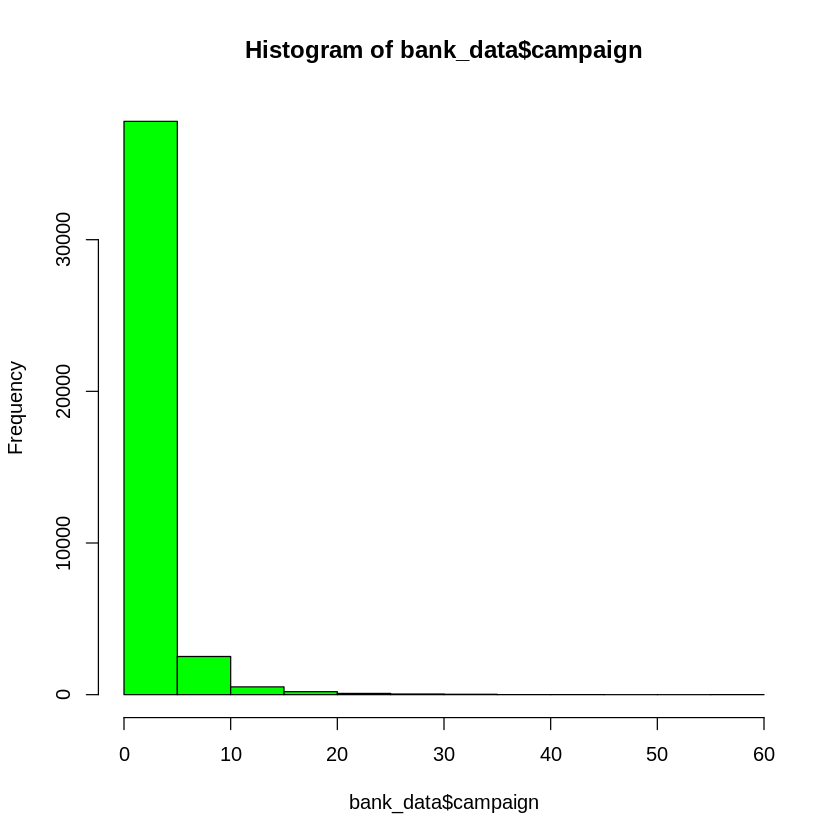

In [ ]:
hist(bank_data$campaign, col="green")



In [ ]:
# Compute the basis stats for bank_data$campaign


campaignDF <- data.frame (
      mean  = mean(bank_data$campaign),
      var   = var(bank_data$campaign),
      std   = sd(bank_data$campaign)
)

campaignDF




mean,var,std
<dbl>,<dbl>,<dbl>
2.567593,7.672975,2.770014


### **Three-Sigma Rule of Thumb**

* A common method to define outliers is the **3 times the standard deviation** 


* So, we obtain the standardized field as **z_score = ($campaign - 2.6)/2.7**

* The rough rule of thumb is that a data value is **an outlier if its z‐value is either greater than 3, or less than −3**. 
* For instance, for a customer who had been contacted 10 times, we would have standardized value (10 - 2.6)/2.7 = 2.7
* 10 contacts is not identified as an outlier using this method since 2.7 < 3.


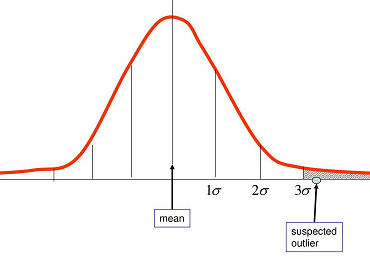


**NOTE**

* The data scientist should consult with the client regarding what they
would like to do with any outliers. 
* Outliers should not be automatically removed nor should they be automatically changed. 
* Their unusual values may bring to light important aspects of the data that should be discussed with the client or with the database administrator.

### **How to Identify Outliers Using R**

* For this example, we will use the **$scaled_age** variable that we created in the previous section. 

* We can isolate individual records using bracket notation detailed
in the previous chapter. 

* The structure of our code will begin as follows **bank_data[ rows of interest, ]**

* We now need to fill in which rows we are interested in. 

* The **which()** command will identify the records that meet specified conditions.

In [ ]:
# Recall that we scaled $age before

summary(bank_data$scaled_age)



       V1         
 Min.   :-2.2093  
 1st Qu.:-0.7700  
 Median :-0.1942  
 Mean   : 0.0000  
 3rd Qu.: 0.6694  
 Max.   : 5.5632  

In [ ]:
# Determine the three sigma rule first for the scaled_age attribute

three_sigma_rule <- (bank_data$scaled_age < -3 | 
                     bank_data$scaled_age > 3 )


# how many outliers are there?
cat ("There are", sum(three_sigma_rule), "outliers \n\n")


# The condition given as input to which() states that we want
# all records whose scaled age values are less than −3 or greater than 3. 

# The which() command returns the row indices of all such records. 


cat("The scaled age values that are outliers: \n\n")
bank_data$scaled_age[which(three_sigma_rule)]


cat("\n\nThe scaled age values that are NOT outliers: \n\n")
bank_data$scaled_age[which(!three_sigma_rule)]




There are 369 outliers 

The scaled age values that are outliers: 



[1] 3.452171 3.164298 4.603665 4.603665 4.603665 4.603665 4.603665 4.603665
  [9] 4.603665 4.603665 4.603665 4.603665 4.603665 4.603665 4.603665 5.275369
 [17] 3.548129 3.356213 3.164298 3.836002 3.836002 3.836002 3.068340 3.068340
 [25] 4.027918 3.164298 3.356213 3.164298 3.164298 3.356213 3.356213 3.644087
 [33] 3.356213 3.644087 3.356213 3.644087 4.315791 4.315791 4.315791 3.836002
 [41] 4.315791 4.315791 3.740045 3.548129 4.123876 3.931960 3.931960 3.164298
 [49] 4.603665 3.931960 3.931960 3.931960 4.123876 3.356213 3.644087 4.603665
 [57] 3.548129 3.068340 3.740045 3.740045 3.260256 3.356213 3.068340 3.068340
 [65] 3.740045 3.260256 3.260256 3.260256 3.260256 3.452171 3.452171 4.027918
 [73] 3.356213 3.164298 3.164298 3.164298 3.164298 3.452171 4.315791 3.836002
 [81] 3.260256 3.260256 3.452171 4.603665 3.260256 3.931960 3.452171 3.260256
 [89] 3.452171 3.164298 3.068340 3.452171 3.068340 3.164298 3.836002 3.260256
 [97] 3.260256 3.836002 3.260256 3.164298 3.260256 3.452171 3.452171 4.507707
[105] 3.740045 3.260256 4.603665 3.931960 3.836002 3.836002 3.644087 3.068340
[113] 3.164298 3.164298 3.164298 3.740045 3.068340 4.123876 3.452171 3.452171
[121] 3.068340 3.452171 3.356213 3.644087 3.644087 4.891538 4.891538 3.452171
[129] 3.164298 3.452171 3.164298 4.123876 3.931960 3.644087 3.356213 4.123876
[137] 4.027918 4.027918 4.027918 3.836002 3.836002 4.411749 3.548129 3.356213
[145] 3.548129 3.836002 3.836002 3.836002 3.260256 3.260256 3.260256 4.123876
[153] 4.315791 4.603665 4.603665 5.563242 5.563242 3.164298 3.068340 3.931960
[161] 3.356213 3.931960 3.164298 3.836002 3.356213 3.068340 4.027918 4.027918
[169] 3.644087 3.644087 3.068340 3.644087 3.740045 3.164298 3.931960 3.931960
[177] 3.452171 3.740045 3.740045 3.068340 3.068340 3.068340 3.068340 3.644087
[185] 3.836002 3.548129 3.548129 3.644087 3.356213 3.068340 3.548129 3.068340
[193] 4.027918 4.123876 4.123876 5.179411 3.644087 4.411749 3.644087 3.068340
[201] 3.548129 3.164298 3.931960 3.452171 4.123876 4.123876 3.836002 3.164298
[209] 4.411749 3.931960 3.260256 4.315791 4.219833 4.315791 3.452171 3.452171
[217] 3.452171 3.452171 3.452171 3.164298 3.164298 3.644087 3.068340 4.315791
[225] 3.260256 3.164298 3.836002 3.164298 4.027918 3.356213 3.356213 3.836002
[233] 3.644087 3.644087 4.411749 4.219833 3.452171 4.027918 3.356213 3.836002
[241] 3.260256 4.027918 4.027918 3.260256 3.260256 3.260256 4.315791 4.315791
[249] 4.315791 3.356213 4.315791 3.836002 3.836002 3.836002 3.836002 3.836002
[257] 3.548129 3.836002 3.164298 3.740045 3.740045 3.068340 3.644087 4.027918
[265] 3.548129 3.548129 4.987496 3.452171 3.548129 3.260256 3.836002 3.740045
[273] 3.452171 3.548129 4.987496 4.219833 3.740045 3.260256 3.068340 3.068340
[281] 3.452171 3.452171 4.699622 3.644087 3.644087 3.260256 4.123876 3.931960
[289] 3.452171 3.452171 4.411749 4.123876 4.123876 3.356213 3.164298 3.068340
[297] 3.068340 3.068340 3.740045 3.164298 4.123876 4.123876 3.164298 3.644087
[305] 3.644087 3.836002 3.644087 3.068340 3.068340 3.644087 3.644087 4.027918
[313] 3.068340 3.068340 4.219833 3.548129 3.260256 3.452171 3.836002 3.931960
[321] 3.548129 3.356213 3.548129 3.068340 3.548129 3.164298 3.164298 4.987496
[329] 3.548129 4.987496 3.356213 3.452171 3.452171 3.068340 3.452171 3.068340
[337] 3.931960 3.644087 3.356213 4.603665 3.452171 4.603665 4.603665 4.315791
[345] 4.699622 4.411749 3.836002 4.123876 4.123876 4.027918 4.219833 4.027918
[353] 4.411749 4.411749 4.027918 3.548129 3.356213 3.260256 3.931960 3.931960
[361] 3.260256 4.219833 3.260256 3.260256 4.219833 3.931960 3.836002 3.164298
[369] 3.260256



The scaled age values that are NOT outliers: 



[1]  1.533015677  1.628973456 -0.290182119 -0.002308783  1.533015677
    [6]  0.477480111  1.820889013  0.093648996 -1.537633243 -1.441675464
   [11]  0.093648996 -1.441675464 -1.057844349  1.628973456 -0.482097677
   [16]  1.341100119 -0.482097677  0.573437889  0.957269004 -0.098266562
   [21] -0.961886571  1.437057898  1.437057898  0.093648996 -0.290182119
   [26] -0.482097677  1.820889013 -0.098266562  1.341100119  1.437057898
   [31]  0.573437889  1.820889013  0.861311226  1.341100119  1.341100119
   [36]  1.437057898 -0.578055456  1.149184562  0.093648996  1.533015677
   [41]  1.724931234 -0.769971013 -0.194224341  1.628973456  0.381522332
   [46]  0.189606774  1.628973456 -0.002308783 -0.482097677  0.477480111
   [51]  1.341100119 -0.098266562  1.916846792  1.245142341  1.437057898
   [56]  1.437057898  0.957269004  0.477480111  1.437057898 -1.441675464
   [61]  0.669395668  1.053226783  0.189606774  0.189606774  0.765353447
   [66] -0.290182119  0.381522332 -0.674013234  1.533015677  0.381522332
   [71]  0.093648996  0.381522332  0.669395668  1.628973456 -0.290182119
   [76]  0.093648996  1.437057898 -0.674013234  1.437057898  0.189606774
   [81]  0.957269004  1.053226783 -0.194224341  0.861311226 -0.194224341
   [86] -0.865928792  0.093648996 -0.098266562  0.861311226 -0.578055456
   [91] -0.482097677  1.628973456  1.916846792 -0.674013234  0.189606774
   [96]  0.477480111  0.189606774  1.245142341 -0.290182119  0.381522332
  [101]  1.341100119  0.861311226  1.341100119  1.149184562  1.149184562
  [106]  0.285564553 -0.578055456 -0.482097677  0.189606774  0.285564553
  [111]  1.916846792  1.724931234 -0.482097677  1.437057898 -0.290182119
  [116] -0.386139898  1.149184562  1.628973456  1.533015677  0.765353447
  [121] -0.002308783  0.861311226  0.093648996  0.477480111 -0.769971013
  [126]  0.189606774  0.957269004 -0.865928792  1.533015677  0.093648996
  [131] -0.290182119  0.093648996 -0.482097677 -0.290182119  1.149184562
  [136] -0.098266562 -0.098266562  1.533015677 -0.578055456  0.477480111
  [141]  0.285564553  1.533015677 -0.098266562  1.245142341 -0.194224341
  [146]  0.189606774  0.189606774 -0.482097677 -0.002308783  1.053226783
  [151]  1.916846792  1.533015677 -0.098266562  1.533015677 -0.002308783
  [156] -0.386139898  1.053226783  1.053226783  0.285564553  1.820889013
  [161] -1.537633243 -0.290182119 -0.002308783  0.189606774 -0.098266562
  [166] -0.290182119 -0.194224341  1.533015677 -0.002308783  1.341100119
  [171]  0.285564553 -0.386139898  0.477480111  0.189606774  0.285564553
  [176]  0.573437889  0.381522332  1.053226783 -1.153802128 -0.290182119
  [181] -0.578055456  0.573437889  0.189606774 -0.386139898  1.341100119
  [186]  1.628973456  1.053226783  1.341100119  0.861311226 -0.578055456
  [191]  0.093648996 -0.194224341  0.477480111  0.189606774 -0.578055456
  [196]  0.765353447 -0.290182119 -0.578055456 -0.002308783  0.285564553
  [201] -0.674013234 -0.769971013 -0.098266562  0.285564553  0.381522332
  [206] -0.482097677 -0.482097677 -0.482097677 -0.386139898 -0.482097677
  [211] -0.386139898  1.437057898  1.820889013  1.628973456 -0.098266562
  [216] -0.098266562 -0.961886571 -0.961886571  0.957269004 -0.002308783
  [221] -0.482097677  0.285564553 -0.386139898  0.573437889 -0.002308783
  [226]  1.724931234  0.189606774 -0.482097677  0.285564553  0.477480111
  [231] -0.098266562  0.957269004 -0.769971013 -0.098266562  1.149184562
  [236]  0.381522332  1.533015677  0.765353447 -0.674013234  0.285564553
  [241]  1.628973456 -0.386139898 -0.578055456 -0.578055456 -0.961886571
  [246] -0.674013234 -0.769971013 -0.386139898 -0.386139898 -0.674013234
  [251] -0.002308783  0.093648996  1.053226783 -0.386139898 -1.153802128
  [256]  1.245142341  1.724931234  0.477480111  0.285564553 -0.674013234
  [261] -0.674013234 -1.249759907  0.189606774  0.285564553  0.189606774
  [266] -1.249759907 -0.578055456 -0.865928792  1.341100119 -0.002308783
  [271]  1.149184562  0.669395668  0.861311226 -0.769971013  0

## **Density Plots**

* A density plot is a representation of the distribution of a numeric variable. It uses a kernel density estimate to show the probability density function of the variable.

* It is a smoothed version of the histogram and is used in the same concept.

* The **bandwidth** is a measure of how closely the density matches the distribution.


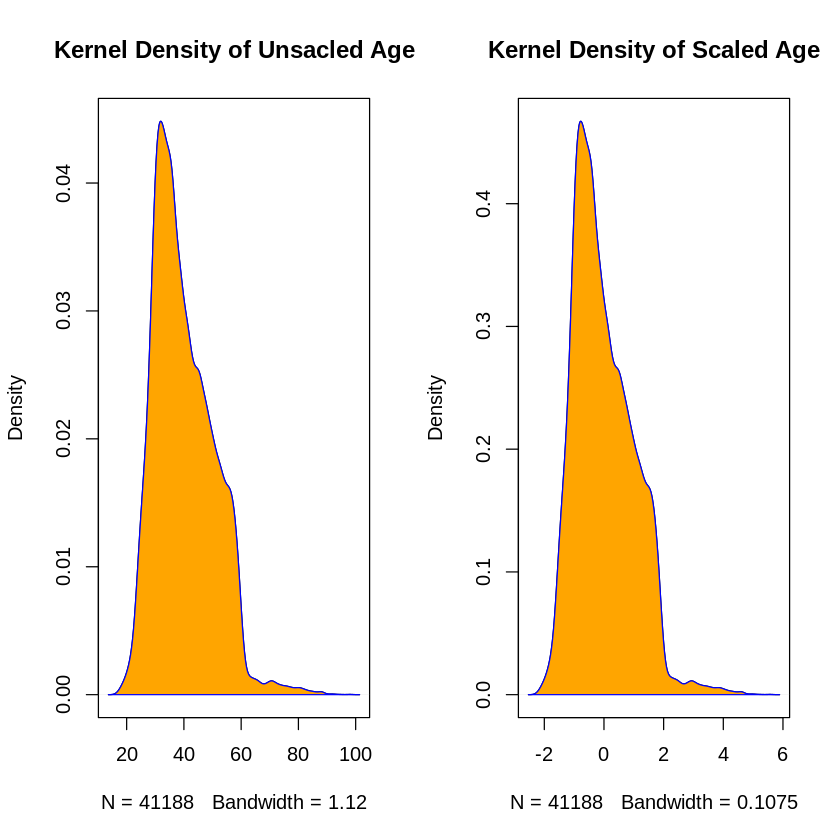

In [ ]:
par(mfrow=c(1, 2))


# Kernel Density Plot
d1 <- density(bank_data$age) 

# plots the results
plot(d1, main="Kernel Density of Unsacled Age") 

# plots the results (filled)
polygon(d1, col="orange", border="blue")


# Kernel Density Plot
d2 <- density(bank_data$scaled_age) 

# plots the results
plot(d2, main="Kernel Density of Scaled Age") 

# plots the results (filled)
polygon(d2, col="orange", border="blue") 




# **References**

* https://towardsdatascience.com/how-to-use-r-in-google-colab-b6e02d736497
* https://www.tutorialspoint.com/r/index.htm
* https://data-flair.training/blogs/why-learn-r/
* https://www.geeksforgeeks.org/multidimensional-array-in-r/
* https://www.r-graph-gallery.com/210-custom-barplot-layout.html
* https://www.kaggle.com/sahistapatel96/bankadditionalfullcsv
* https://bookdown.org/ndphillips/YaRrr/arranging-plots-with-parmfrow-and-layout.html
* https://www.datasciencemadesimple.com/table-function-in-r/#:~:text=Table%20function%20in%20R%20%2Dtable,with%20condition%20and%20cross%20tabulations
* https://www.datacamp.com/community/tutorials/sorting-in-r
* https://www.statmethods.net/stats/frequencies.html
* https://ggplot2.tidyverse.org/reference/geom_bar.html
* https://www.displayr.com/what-is-a-crosstab/
* Data Science Using Python and R, Larose and Larose, Wiley, 2019
* https://cran.r-project.org/web/packages/formattable/vignettes/formattable-data-frame.html
* https://www.analyticsvidhya.com/blog/2016/03/tutorial-powerful-packages-imputing-missing-values/







